Notebook purpose

- Explore and sense-check tag groups and tags

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.helpers.aws as aws
import entropy.helpers.data as hd

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_seq_items", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plotargs = dict(figsize=(10, 4))

In [75]:
dfs, df = hd.read_samples(["777", "XX7"])
hd.inspect(df)

Time for read_sample    : 1.63 seconds
Time for read_sample    : 4.84 minutes
(7,531,116, 31)


,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_sptac
0,19510816,2014-03-07,107,9.20,paypal sandrpowell 9001,paypal,spend,services,0.0,gl3 4,2010-05-10,40k to 50k,1984.0,2014-05-11,238820,2020-08-16 12:13:00,barclaycard,credit card,2014-07-18,2017-09-12,True,NaN,paypal,enjoyment,home electronics,home electronics,u,201403,NaN,27530.926758,2.036569
1,19510817,2014-03-08,107,6.94,paypal smartbitsso 9001,paypal,spend,services,0.0,gl3 4,2010-05-10,40k to 50k,1984.0,2014-05-11,238820,2020-08-16 12:13:00,barclaycard,credit card,2014-07-18,2017-09-12,True,NaN,paypal,enjoyment,home electronics,home electronics,u,201403,NaN,27530.926758,2.036569


## Overview

### Tag groups

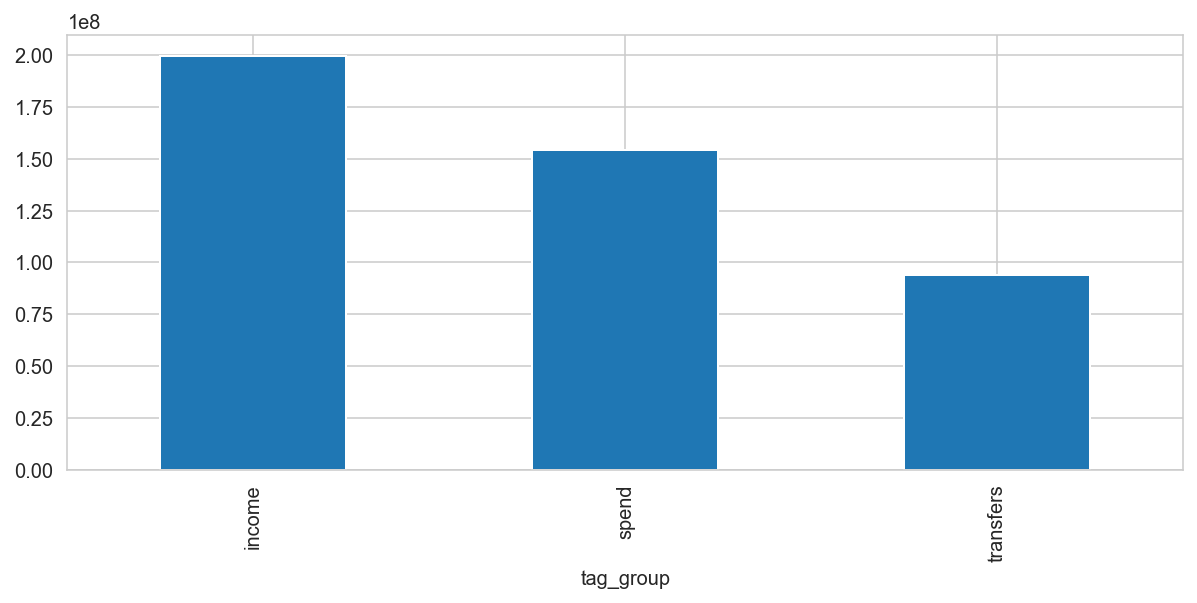

In [76]:
df.groupby("tag_group").amount.sum().abs().plot(kind="bar", **plotargs);

### Tags

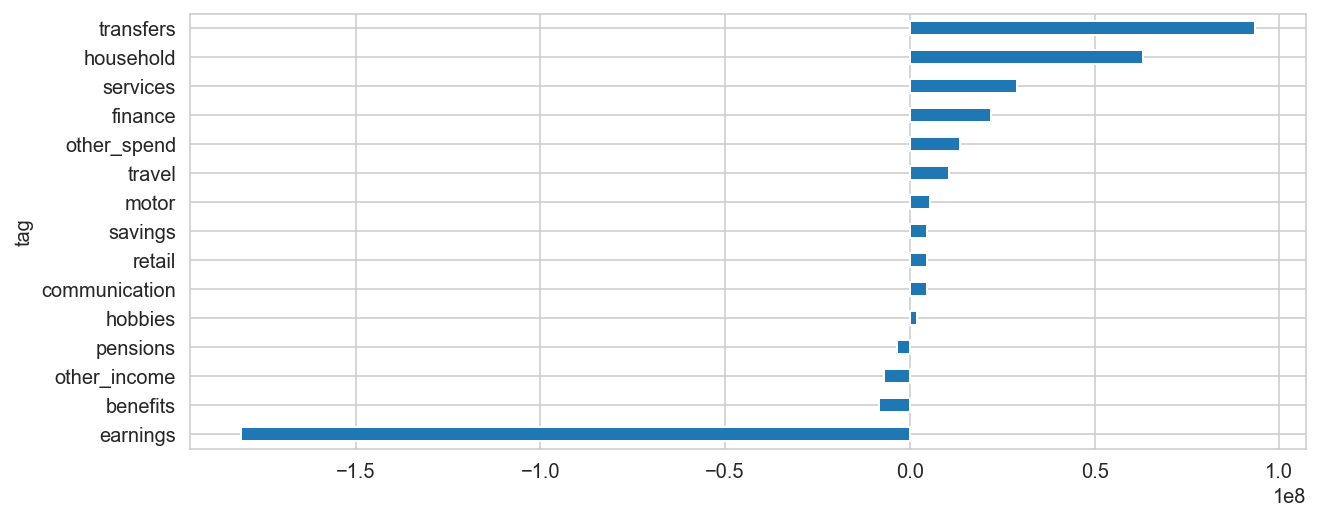

In [77]:
df.groupby("tag", dropna=False).amount.sum().round().sort_values().plot(
    kind="barh", **plotargs
);

## Breakdowns

In [78]:
def breakdown(
    df, group_var, group_var_value, component_var, metric="value", net=False, top_n=None
):
    """Calculates sorted breakdown of group_var_value by component_var.

    Args:
      metric:
        "value" calculates amount spent on components, "counts" the number of
        transactions per component.
      net:
        Boolean indicating whether, if metric is "value", net or gross amounts
        are calculated. Defaults to False, which produces gross amounts.
      top_n:
        Number of components returned in descending order. Returns all
        components by default.
    """
    return (
        df[df[group_var].eq(group_var_value)]
        .assign(amount=lambda df: df.amount if net else df.amount.abs())
        .groupby(component_var)
        .amount.agg("sum" if metric == "value" else "count")
        .replace(0, np.nan)
        .dropna()
        .sort_values()
    ).iloc[:top_n]

### Tag groups into tags

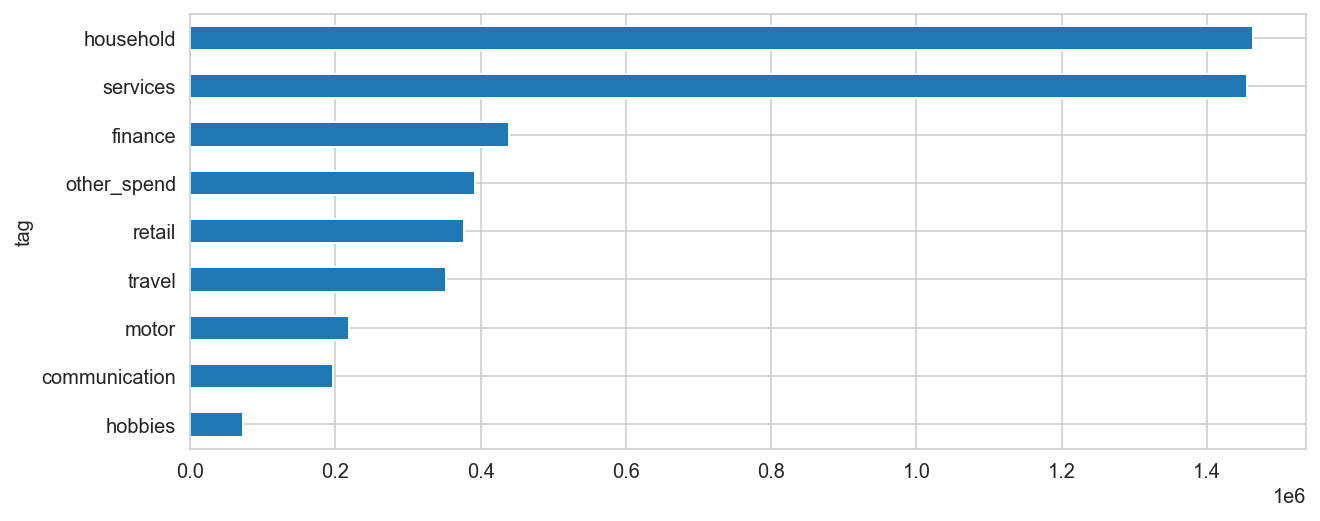

In [84]:
breakdown(df, "tag_group", "spend", "tag", metric="counts", net=False).plot(
    kind="barh", **plotargs
);

### Tags into auto tags

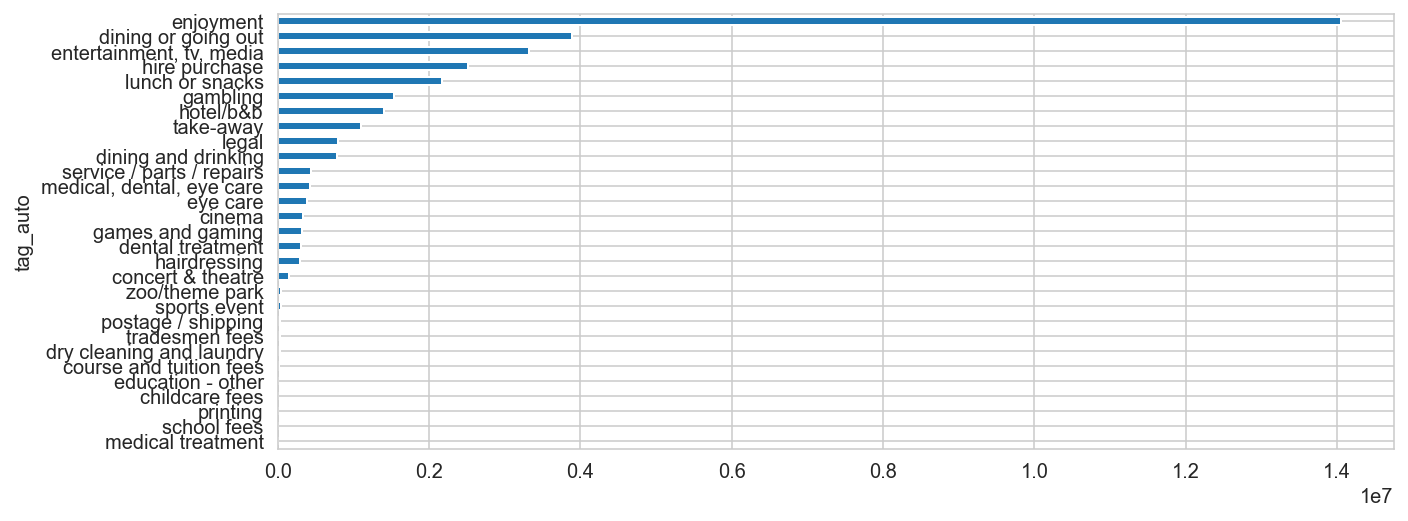

In [82]:
breakdown(df, "tag", "services", "tag_auto", metric="value", net=False).plot(
    kind="barh", **plotargs
);

### Auto tag into merchants

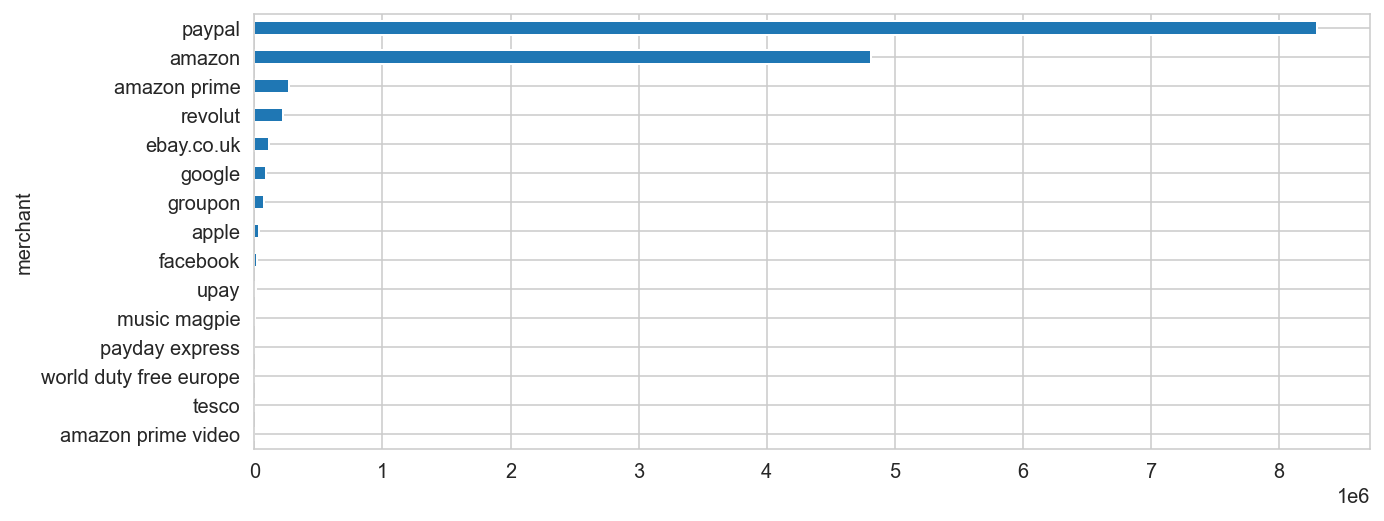

In [81]:
breakdown(
    df, "tag_auto", "enjoyment", "merchant", metric="value", net=False, top_n=20
).plot(kind="barh", **plotargs);